In [56]:
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
print("The dataset has the lenght of: ", len(x))

The dataset has the lenght of:  100


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

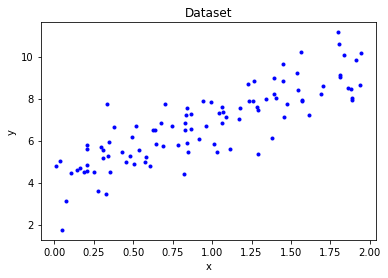

In [58]:
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [59]:
import pandas as pd

In [60]:
data = {"Amount_damaged_equipment": x.flatten(), "Cost": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Amount_damaged_equipment,Cost
0,0.205798,5.774085
1,1.392168,8.236052
2,0.606666,4.805987
3,1.012696,5.833270
4,1.794797,11.157773
5,1.256443,7.887055
6,1.564794,10.198105
7,1.569108,7.926413
8,0.576507,4.973070
9,1.877365,8.436702


In [61]:
#Scalling up the data of affected equipment 
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"] * 1000
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"].astype(int)
#Scalling up the data of cost
df["Cost"] = df["Cost"] * 10000
df["Cost"] = df["Cost"].astype(int)
df.head(10)


,Amount_damaged_equipment,Cost
0,205,57740
1,1392,82360
2,606,48059
3,1012,58332
4,1794,111577
5,1256,78870
6,1564,101981
7,1569,79264
8,576,49730
9,1877,84367


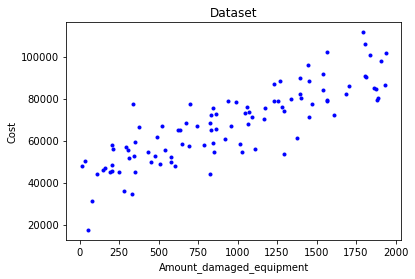

In [62]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#Fitting the data to the model
#Model gets the input and output parameters
#Model predicts the output based on the input
lin_reg.fit(df['Amount_damaged_equipment'].values.reshape(-1, 1), df['Cost'].values)

LinearRegression()

In [64]:
#parameter of theta 0 and theta 1 respectivly
print("Theta 0: ", lin_reg.intercept_)
print("Theta 1: ", lin_reg.coef_)

Theta 0:  42267.61065507125
Theta 1:  [26.83544208]


In [65]:
#prediction for the minimum and max value of the dataset of the amount of data during the training
print("The minimum value of the dataset: ", df['Amount_damaged_equipment'].min())
print("The maximum value of the dataset: ", df['Amount_damaged_equipment'].max())
#fit those values into an array
x_minimun_maximun = np.array([df['Amount_damaged_equipment'].min(), df['Amount_damaged_equipment'].max()])
print(x_minimun_maximun)
y_train_pred = lin_reg.predict(x_minimun_maximun.reshape(-1, 1))

The minimum value of the dataset:  12
The maximum value of the dataset:  1940
[  12 1940]


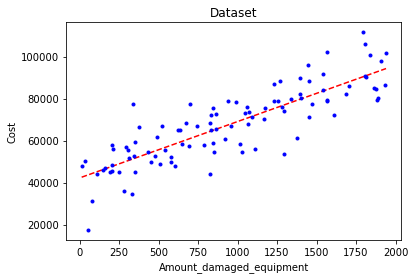

In [66]:
plt.plot(x_minimun_maximun, y_train_pred, 'r--')
plt.plot(df['Amount_damaged_equipment'], df['Cost'], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()
#prediction for the minimum and max value of the dataset of the amount of data during the training
#red line is the prediction of the model
#blue dots are the actual data

In [67]:
x_new = np.array([[1200]])
#prediction of the cost of the equipment
damage_cost = lin_reg.predict(x_new)
#print("The cost of the equipment is: ", damage_cost, "$")
#print("The cost of the equipment is: ", int(damage_cost)[0], "$")
print("The cost of the equipment is: ", int(damage_cost), "$")


The cost of the equipment is:  74470 $


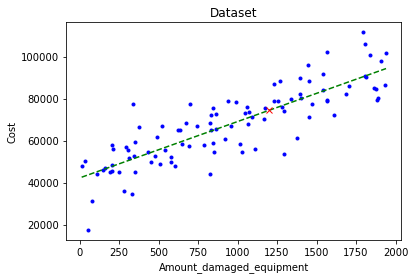

In [68]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.plot(x_minimun_maximun, y_train_pred, 'g--')
plt.plot(x_new, damage_cost, 'rx')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

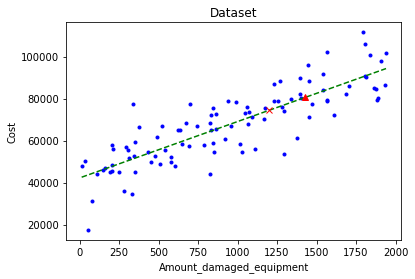

In [92]:
#extra case
x_new2 = np.array([[1427]])
#prediction of the cost of the equipment
prediction2 = lin_reg.predict(x_new2)
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.plot(x_minimun_maximun, y_train_pred, 'g--')
plt.plot(x_new, damage_cost, 'rx')
plt.plot(x_new2, prediction2, 'r^')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

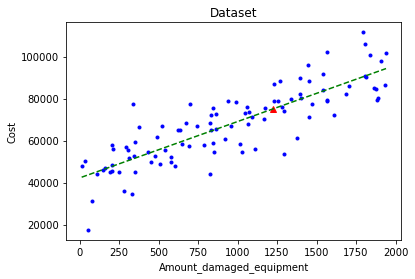

In [95]:
x_new3 = np.array([[1223]])
prediction3 = lin_reg.predict(x_new3)
plt.plot(x_new3, prediction3, 'r^')
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.plot(x_minimun_maximun, y_train_pred, 'g--')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()